<a href="https://colab.research.google.com/github/Dorra2021/KNN_Vin/blob/main/wine_F_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [229]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
os.chdir('/content/drive/My Drive/wine_ML/')

In [231]:
pd.set_option('display.max_columns', None)

In [232]:
data= pd.read_csv('/content/drive/My Drive/wine_ML/winequality-white.csv',sep=";")
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [233]:
data.shape

(4898, 12)

Diviser notre data set en target et variables explicatives

In [234]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [235]:
y=data.iloc[:,-1].values
X=data.iloc[:,1:11].values

In [236]:
X

array([[ 0.27,  0.36, 20.7 , ...,  3.  ,  0.45,  8.8 ],
       [ 0.3 ,  0.34,  1.6 , ...,  3.3 ,  0.49,  9.5 ],
       [ 0.28,  0.4 ,  6.9 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 0.24,  0.19,  1.2 , ...,  2.99,  0.46,  9.4 ],
       [ 0.29,  0.3 ,  1.1 , ...,  3.34,  0.38, 12.8 ],
       [ 0.21,  0.38,  0.8 , ...,  3.26,  0.32, 11.8 ]])

In [237]:
y

array([6, 6, 6, ..., 6, 7, 6])

In [238]:
#X = data[data.columns[:-1]].values #data.columns pour faire référence au nom des colonnes
#[prendre toutes les colonnes jusqu'à la colonne n-1]
#.values enlève tous les noms de colonnes et retoutne un numpy array avec toutes les valeurs

In [239]:
print(X)

[[ 0.27  0.36 20.7  ...  3.    0.45  8.8 ]
 [ 0.3   0.34  1.6  ...  3.3   0.49  9.5 ]
 [ 0.28  0.4   6.9  ...  3.26  0.44 10.1 ]
 ...
 [ 0.24  0.19  1.2  ...  2.99  0.46  9.4 ]
 [ 0.29  0.3   1.1  ...  3.34  0.38 12.8 ]
 [ 0.21  0.38  0.8  ...  3.26  0.32 11.8 ]]


In [240]:
#XTrain = data.iloc[:,:-1].values
#print(XTrain)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


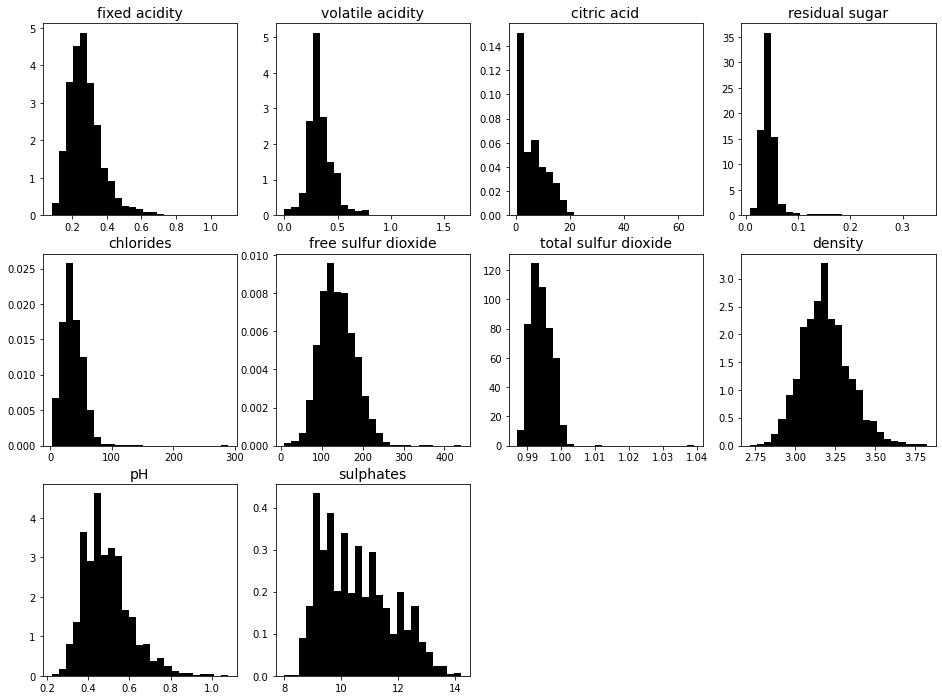

In [242]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=25, color='black', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [243]:
########## Choix pour retomber sur une target binaire
y_class = data['quality'].apply(lambda x: 0 if x<=6 else 1) 

In [244]:
y_class

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: int64

Normalisation: 

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.30)

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nor = scaler.transform(X_train)
X_test_nor = scaler.transform(X_test)

In [247]:
X_train_nor

array([[ 0.009815  ,  0.71719143,  0.34839633, ..., -0.31540748,
        -0.0990846 , -0.89999105],
       [ 0.20802312, -0.11316936, -0.92839695, ...,  0.6141004 ,
        -0.71061597,  0.56540393],
       [ 0.50533529, -0.11316936,  1.80197637, ...,  0.41492014,
         0.5998084 , -0.08588273],
       ...,
       [-1.08032964,  0.71719143,  1.7037615 , ..., -2.10802981,
        -0.18644622, -0.81858022],
       [ 0.20802312, -0.61138583,  1.36983095, ..., -0.11622722,
        -0.53589272, -0.81858022],
       [ 1.59547993, -2.43817956, -0.98732587, ...,  1.14524775,
        -1.40950898,  1.29810141]])

In [248]:
y_test

2020    0
2279    0
3655    1
2370    1
1518    0
       ..
1034    0
1687    1
1156    0
1068    1
633     0
Name: quality, Length: 1470, dtype: int64

KNN classifier parce qu'on a une cible binaire 

In [260]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_nor, y_train)

KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[1056  109]
 [ 150  155]]
Normalized confusion matrix
[[0.90643777 0.09356223]
 [0.49180328 0.50819672]]


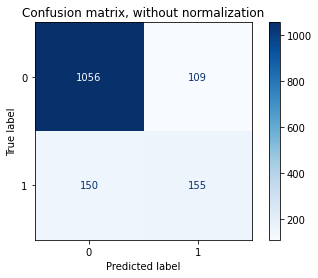

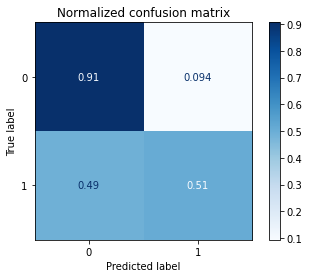

In [261]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_nor, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##Grid Search (with CV) after KNN

In [252]:
########## Choix pour retomber sur une target binaire
#y c'est la variable expliquée(target) et x l'ensemble des variables explicatives
#numpy.where(condition, [x, y, ]/)
#Return elements chosen from x or y depending on condition.
#y_class = np.where(y<=6, 0, 1)

on va effectuer un grid search pour optimiser le nombre des voisins ///
on est sur un KNN, c'est une classification

In [263]:
########## On va effectuer un grid search pour optimiser le parametre du nombre de voisins 

from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3,5,7,9,11,13,15]}

#on va choisir un score à optimiser 
#l'accuracy : proportion des predictions correctes
#on commence par accuracy et après on se pose la question si on veut la changer
#notre target est la note (on la divisé en 2: bon 1 et mauvais 0)
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
########## On va effectuer un grid search pour optimiser le parametre du nombre de voisins 

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
#estimator = KNeighborsClassifier()
     # un classifieur kNN
         # hyperparamètres à tester
               # nombre de folds de validation croisée
     # score à optimiser
clf = model_selection.GridSearchCV(KNeighborsClassifier(),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring=score
                                   )#verbose=3

# Optimiser ce classifieur sur le jeu d'entraînement
model = clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print(f"Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {model.best_params_}")


# Afficher les performances correspondantes
print(f"Résultats de la validation croisée : {model.best_score_}")
for i in range(len(param_grid["n_neighbors"])):
  print(f"accuracy = {model.cv_results_['mean_test_score'][i]} +/- ({model.cv_results_['std_test_score'][i]}) for n_neighbors : {param_grid['n_neighbors'][i]}")
########## 7 ou 9 plus proches voisins semble le plus adapté

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 15}
Résultats de la validation croisée : 0.775670660339214
accuracy = 0.7076997722968228 +/- (0.007241891668468443) for n_neighbors : 3
accuracy = 0.737455257389713 +/- (0.005875710368393879) for n_neighbors : 5
accuracy = 0.7511685216318019 +/- (0.0038688541790519765) for n_neighbors : 7
accuracy = 0.7567087314592156 +/- (0.007010070793026561) for n_neighbors : 9
accuracy = 0.7651686493158265 +/- (0.006601412883934844) for n_neighbors : 11
accuracy = 0.7733365963695176 +/- (0.00204234117487401) for n_neighbors : 13
accuracy = 0.775670660339214 +/- (0.0011378387604473541) for n_neighbors : 15


In [267]:
model.best_score_ #résultat de la validation croisée

0.775670660339214

In [264]:
param_grid["n_neighbors"]

[3, 5, 7, 9, 11, 13, 15]

In [265]:
model.cv_results_['mean_test_score'][0]

0.7076997722968228

In [266]:
model.cv_results_['std_test_score'][0]

0.007241891668468443

##Courbe ROC

Text(0, 0.5, 'Sensibilite')

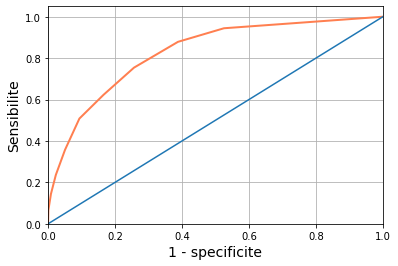

In [258]:
########## et voici la courbe roc associée
y_pred_proba = clf.predict_proba(X_test_nor)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.plot([0,1],[0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [259]:
fpr

array([0.00000000e+00, 8.58369099e-04, 8.58369099e-03, 2.31759657e-02,
       5.06437768e-02, 9.35622318e-02, 1.65665236e-01, 2.56652361e-01,
       3.87982833e-01, 5.25321888e-01, 1.00000000e+00])

https://kobia.fr/classification-metrics-matrice-de-confusion/ 
https://kobia.fr/category/classification-metrics/#1 

In [ ]:
########## et voici la courbe roc associée
y_pred_proba = neigh.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.plot([0,1],[0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

In [ ]:
y_pred_proba_dict = {}
metrics_dict = {}
for i in [3,5,7,9,11,13,15]:
  clf =KNeighborsClassifier(n_neighbors=9)
  clf.fit(X_train_std, y_train)
  y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
  y_pred_proba_dict[i] = clf.predict_proba(X_test_std)[:, 1]
  [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
  metrics_dict["fpr_n_neighbors_"+str(i)]=fpr
  metrics_dict["tpr_n_neighbors_"+str(i)]=tpr
  metrics_dict["thr_n_neighbors_"+str(i)]=thr


In [ ]:
exercice:
http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/notebooks/seance6_graphes_ml_enonce.html#:~:text=La%20matrice%20de%20confusion%20est,score%20retourn%C3%A9%20par%20le%20mod%C3%A8le. 